<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">
 
# Decision Trees
 
_Authors: Joseph Nelson, David Yerrington, Matt Brems, Jeff Hale_

*Some adapted from Chapter 8 of ISLR*

---

## Learning Objectives

After this lesson you will be able to:

- Explain how a decision tree is created.
- Build a decision tree model in scikit-learn.
- Tune a decision tree model and explain how tuning effects the model.
- Interpret a tree diagram.
___


## Introduction

## Decision Trees

- Non-parametric models - what does that mean?
- Can be used for regression or classification. 

### Decision tree benefits:

- Explainable
- Interpretable
- Visualizable
- Basis for more sophisticated models.

---
## What will we get for dinner?

|$Y = $ Food|$X_1 = $ Weather|$X_2 = $ Day|
|:---------:|:--------------:|:----------:|
|   Indian  |      Rainy     |   Weekday  |
|   Sushi   |      Sunny     |   Weekday  |
|   Indian  |      Rainy     |   Weekend  |
|  Mexican  |      Sunny     |   Weekend  |
|   Indian  |      Rainy     |   Weekday  |
|  Mexican  |      Sunny     |   Weekend  |

<details><summary>It's a rainy day. Based on our past orders, what do you think we'll order?</summary>

- Indian food.
- In 100% of past cases where the weather is rainy, we've eaten Indian food!

|$Y = $ Food|$X_1 = $ Weather|$X_2 = $ Day|
|:---------:|:--------------:|:----------:|
|   Indian  |      Rainy     |   Weekday  |
|   Indian  |      Rainy     |   Weekend  |
|   Indian  |      Rainy     |   Weekday  |

</details>

<details><summary>It's a sunny day. Based on our past orders, what do you think we'll order?</summary>

- Either Sushi or Mexican food... but we can't say with certainty whether we'd eat sushi or Mexican food.
- Based on our past orders, we eat sushi on 1/3 of sunny days and we eat Mexican food on 2/3 of sunny days.
- If I **had** to make a guess here, I'd probably predict Mexican food, but we may want to use additional information to be certain.

|$Y = $ Food|$X_1 = $ Weather|$X_2 = $ Day|
|:---------:|:--------------:|:----------:|
|   Sushi   |      Sunny     |   Weekday  |
|  Mexican  |      Sunny     |   Weekend  |
|  Mexican  |      Sunny     |   Weekend  |

</details>

<details><summary>It's a sunny day that also happens to be a weekend. Based on our past orders, what do you think we'll order?</summary>

- Mexican food.
- In 100% of past cases where the weather is sunny and where it's a weekend, we've eaten Mexican food!

|$Y = $ Food|$X_1 = $ Weather|$X_2 = $ Day|
|:---------:|:--------------:|:----------:|
|  Mexican  |      Sunny     |   Weekend  |
|  Mexican  |      Sunny     |   Weekend  |

</details>

---
# Decision Trees: Overview

A decision tree for classification:
- takes a dataset consisting of $X$ and $Y$ data, 
- finds rules based on our $X$ data that splits our data into smaller datasets such that
- by the bottom of the tree, the values $Y$ in each "leaf node" are as "pure" as possible.

We frequently see decision trees represented by a graph.

<img src="images/order_food_dt.png" alt="order_food" width="750"/>

- (This image was created using [Draw.io](https://www.draw.io/).)

### Terminology
Decision trees look like upside down trees. 
- The top node is the "root node," through which all of our observations are passed.
- At each internal split, our dataset is partitioned.
- A "parent" node is split into two "child" nodes.
- At each of the "leaf nodes" (colored orange), we contain a subset of records that are as pure as possible.
    - In this food example, each leaf node is perfectly pure. Once we get to a leaf node, every observation in that leaf node has the exact same value of $Y$!
    - There are ways to quantify the idea of "purity" here so that we can let our computer do most of the tree-building (model-fitting) process... we'll come back to this later.


- [DecisionTreeClassifier Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- [DecisionTreeRegressor Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)

---
## Purity in Decision Trees

When quantifying how "pure" a node is, we want to see what the distribution of $Y$ is in each node, then summarize this distribution with a number.

<img src="images/order_food_dt.png" alt="order_food" width="750"/>

---
#### For a continuous $y$ (i.e. using a decision tree to predict income), the default option is **mean squared error**.
- This is the `criterion = 'mse'` argument in `DecisionTreeRegressor`.
- When the decision tree is figuring out which split to make at a given node, it picks the split that maximizes the drop in MSE from the parent node to the child node.
    
    
---
#### For a discrete $y$, the default option is the **Gini impurity**, a measure of the homogeneity of the outcome class. 0 means totally homogeneous.
$$
\begin{eqnarray*}
\text{Gini impurity} &=& 1 - \sum_{i=1}^{classes} P(\text{class i})^2 \\
\text{Gini impurity (2 classes)} &=& 1 - P(\text{class 1})^2 - P(\text{class 2})^2 \\
\text{Gini impurity (3 classes)} &=& 1 - P(\text{class 1})^2 - P(\text{class 2})^2 - P(\text{class 3})^2 \\
\end{eqnarray*}
$$

Where P = probability

In [1]:
y = ['Indian', 'Sushi', 'Indian', 'Mexican', 'Indian', 'Mexican']

In [2]:
1 - (3/6)**2 - (2/6)**2 - (1/6)**2

0.611111111111111

### Gini Practice

<details><summary>What is the Gini impurity of a node when every y is from the same class?</summary>
    
- Our Gini impurity is zero.

$$
\begin{eqnarray*}
\text{Gini impurity} &=& 1 - \sum_{i=1}^{classes} P(\text{class i})^2 \\
&=& 1 - P(\text{class 1})^2 \\
&=& 1 - 1^2 \\
&=& 1 - 1 \\
&=& 0
\end{eqnarray*}
$$
</details>

<details><summary>What is the Gini impurity of a node when we have two classes, each with two items?</summary>
    
- Our Gini impurity is 0.5.

$$
\begin{eqnarray*}
\text{Gini impurity} &=& 1 - \sum_{i=1}^{classes} P(\text{class i})^2 \\
&=& 1 - P(\text{class 1})^2 - P(\text{class 2})^2 \\
&=& 1 - \left(\frac{1}{2}\right)^2 - \left(\frac{1}{2}\right)^2 \\
&=& 1 - \frac{1}{4} - \frac{1}{4} \\
&=& \frac{1}{2}
\end{eqnarray*}
$$
</details>

<details><summary>What is the Gini impurity of a node when we have two classes, each with three items?</summary>
    
- Our Gini impurity is 0.5.

$$
\begin{eqnarray*}
\text{Gini impurity} &=& 1 - \sum_{i=1}^{classes} P(\text{class i})^2 \\
&=& 1 - P(\text{class 1})^2 - P(\text{class 2})^2 \\
&=& 1 - \left(\frac{1}{2}\right)^2 - \left(\frac{1}{2}\right)^2 \\
&=& 1 - \frac{1}{4} - \frac{1}{4} \\
&=& \frac{1}{2}
\end{eqnarray*}
$$
</details>

---
### How does a CLASSIFICATION decision tree decide which variable to split on?

1. At each node, consider the SUBSET of our DataFrame that exists at that node.
1. Iterate through EACH feature that could potentially split the data.
1. Calculate the Gini impurity for EACH possible split.
1. Select the feature split that DROPS the Gini impurity to the lowest level.
1. Repeat



A decision tree makes the best short-term decision by optimizing at each node individually. _This might mean that our tree isn't optimal in the long run!_ 

Decision tree fitting use a **greedy** algorithm because it makes locally optimal decisions. 

In [3]:
import seaborn as sns

In [4]:
titanic = sns.load_dataset('titanic')

In [6]:
titanic[['survived', 'pclass', 'age']].head()

,survived,pclass,age
0,0,3,22.0
1,1,1,38.0
2,1,3,26.0
3,1,1,35.0
4,0,3,35.0


In [7]:
gini_all = 1 - (2/5)**2 - (3/5)**2

In [8]:
1 - (1/4)**2 - (3/4)**2

0.375

In [9]:
1 - (1/3)**2 - (2/3)**2

0.4444444444444444

In [10]:
1/5*0 + 4/5*.375

0.30000000000000004

In [11]:
2/5*0 + 3/5*.44

0.264

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
X = titanic[['pclass', 'age']].head()
y = titanic['survived'].head()

In [20]:
dtree = DecisionTreeClassifier(max_depth = 2).fit(X, y)

In [21]:
from sklearn.tree import plot_tree

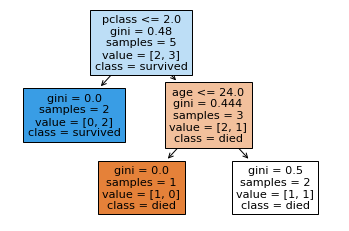

In [22]:
plot_tree(dtree, feature_names=X.columns, class_names=['died', 'survived'], filled = True);

In [19]:
X

,pclass,age
0,3,22.0
1,1,38.0
2,3,26.0
3,1,35.0
4,3,35.0


---
# Part 1: Regression Trees 🌲



## How Does a Computer Build a regression Tree? 

It has to do something different with a continuous y.


Recursive binary splitting.

1. Begin at the top of the tree.
2. For **every feature**, examine **every possible cutpoint**, and choose the feature and cutpoint so that the resulting tree has the **lowest possible mean squared error (MSE)**. Make that split.
3. Examine the two resulting regions. Once again, make a **single split** (in one of the regions) to minimize the MSE.
4. Keep repeating Step 3 until a **stopping criterion** is met:
    - Maximum tree depth (maximum number of splits required to arrive at a leaf).
    - Minimum number of observations in a leaf.

Remember this is a greedy algorithm (locally optimimal).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error

### Read in vehicle data

In [ ]:
path = './data/vehicles_train.csv'
train = pd.read_csv(path)
train

In [ ]:
train.info()

#### Make X and y. Use year, miles, and doors to pedict price.

In [ ]:
X = train.drop(columns=['price', 'vtype'])
y = train['price']

#### Make train and test sets out of the train data


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

#### Make a null baseline model and calculate the RMSE

---
## Build a regression tree
At every split, it will look at each feature for every potential cutpoint. It will choose the cutpoint that produces the lowest MSE.

#### Instantiate a DecisionTreeRegressor (with random_state=1).

### Create a Tree Diagram

Use the `plot_tree()` function. You may need to install a package in your conda environment.

---
### Every tree is just a graph in disguise! 🌳

A graph is made of nodes and edges (boxes and lines). A node is also called a vertex.

A tree is a graph with one node with no incoming edges (the root). Each other node has exactly one incoming edge (to its parent node).

#### Reading the graph:

- **rule:** Rule used to split that node (go left if true, go right if false).
- **samples:** Number of observations in that node before splitting.
- **mse:** MSE calculated by comparing the actual response values in that node against the mean response value in that node.
- **value:** Mean target value in that node (predicted value if a terminal node).

### What does a complete tree mean in terms of bias/variance?



---

<a id="#tuning-tree"></a>
## Tuning a Regression Tree

Let's try to reduce the MSE by tuning the **max_depth** parameter:

#### Try a few different values for `max_depth`.


### Find the most important features ⭐️
We don't have coefficients, but we have a feature importance metric.
#### _Gini importance_ of each feature: the (scaled, between 0 and 1) total reduction of error brought by that feature.

You can access the `feature_importances_` attribute through the `best_estimator_` attribute of the GridSearchCV object.

#### Which feature does the model think is most important?

### What happens when making predictions for new data?

#### Import **new** unseen data

#### Using the tree diagram above, what predictions will the model make for each observation?

#### Use the  fitted model to make predictions on final holdout testing data.

#### Calculate RMSE

---
# Part 2: Classification Trees

### Gini Index

- Gini index makes splits that **increase node purity**, even if that split does not change the classification error rate.
- Node purity is important because we're interested in the **class proportions** in each region. That's how we calculate the **predicted probability** of each class.
- scikit-learn's default splitting criteria for classification trees is gini.

---
## Building a Classification Tree in `scikit-learn`

We'll build a classification tree using the Titanic survival data set:

#### Read in the data.

In [24]:
import pandas as pd

In [26]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


- **Survived:** 0=died, 1=survived (response variable)
- **Pclass:** 1=first class, 2=second class, 3=third class
- **Sex:** female, male
- **Age:** Numeric value
- **Embarked:** C or Q or S

In [27]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


#### Define X and y.

In [29]:
feature_cols = ['pclass', 'age', 'sex', 'embarked']

X = titanic[feature_cols]
y = titanic['survived']

#### TTS 

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42)

Generally, for scikit-learn estimators, all our feature columns need to encoded numerically, but decision trees in scikit-learn will work with categorical data. But some scoring functions won't. ☹️

#### Fill missing values with KNN Imputation
Should standard scale first. We'll just go with this for now and add standard scaling later.

In [34]:
X.head()

,pclass,age,sex,embarked
0,3,22.0,male,S
1,1,38.0,female,C
2,3,26.0,female,S
3,1,35.0,female,S
4,3,35.0,male,S


In [35]:
from sklearn.preprocessing import OneHotEncoder

In [37]:
#select the categories to OHE and everything else pass it through -- make_column_transformer
from sklearn.compose import make_column_transformer

In [38]:
transformer = make_column_transformer((OneHotEncoder(drop = 'if_binary'), ['sex', 'embarked']),
                                     remainder = 'passthrough')

In [39]:
X_train_ohe = transformer.fit_transform(X_train)

In [45]:
X_train_ohe

array([[ 0.,  0.,  0., ...,  0.,  1., 35.],
       [ 1.,  0.,  0., ...,  0.,  2., 19.],
       [ 1.,  0.,  0., ...,  0.,  2., 34.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  3., 48.],
       [ 1.,  0.,  0., ...,  0.,  1., 47.],
       [ 1.,  0.,  0., ...,  0.,  3., 27.]])

In [40]:
X_test_ohe = transformer.transform(X_test)

In [41]:
# #convert categories to numbers -- Didn't work because not all categorical!!!
# ohe = OneHotEncoder(drop = 'if_binary')
# X_train_ohe = ohe.fit_transform(X_train)
# X_test_ohe = ohe.transform(X_test)

In [32]:
from sklearn.impute import KNNImputer

In [42]:
imputer = KNNImputer()
X_train_filled = imputer.fit_transform(X_train_ohe)

In [43]:
X_test_filled = imputer.transform(X_test_ohe)

---
#### Fit a classification tree with max_depth=2 on all data.

In [44]:
dtree = DecisionTreeClassifier(max_depth = 2).fit(X_train_filled, y_train)

#### Create a  visualization.

In [50]:
import matplotlib.pyplot as plt

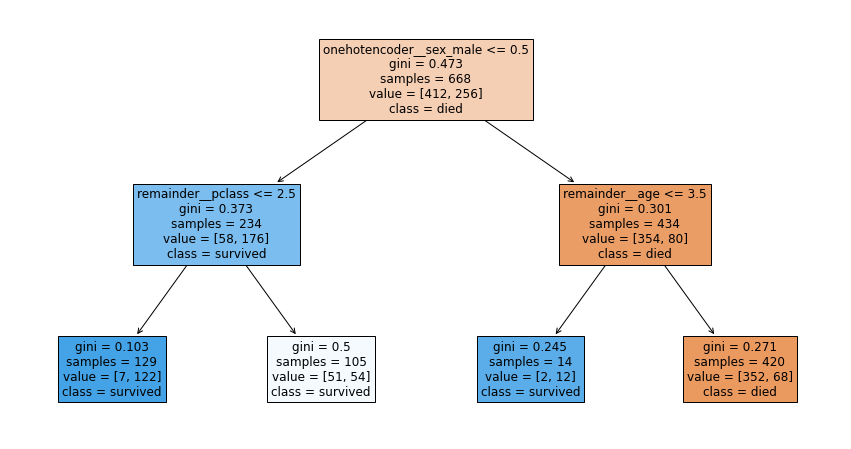

In [54]:
fig, ax = plt.subplots(figsize = (15, 8))
plot_tree(dtree, feature_names=transformer.get_feature_names_out(), #if version < 1.0 .get_feature_names()
         fontsize = 12, ax = ax, filled = True, class_names = ['died', 'survived']);

#### Compute the feature importances (the Gini index at each node).

In [59]:
importance_df = pd.DataFrame({'importance': dtree.feature_importances_,
                              'features': transformer.get_feature_names_out()})
importance_df

,importance,features
0,0.738857,onehotencoder__sex_male
1,0.000000,onehotencoder__embarked_C
2,0.000000,onehotencoder__embarked_Q
3,0.000000,onehotencoder__embarked_S
4,0.000000,onehotencoder__embarked_nan
5,0.162427,remainder__pclass
6,0.098716,remainder__age


#### Compute all the metrics and confusion matrix

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay

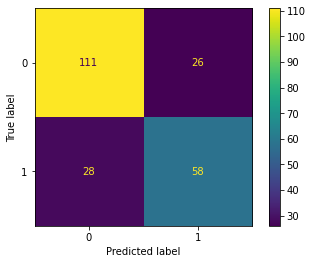

In [61]:
ConfusionMatrixDisplay.from_estimator(dtree, X_test_filled, y_test)

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
params = {'max_depth': [2, 3, 4, 5, 6]}

In [72]:
grid = GridSearchCV(dtree, param_grid=params, scoring = 'precision')

In [73]:
grid.fit(X_train_filled, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(max_depth=2),
             param_grid={'max_depth': [2, 3, 4, 5, 6]}, scoring='precision')

In [74]:
grid.best_params_

{'max_depth': 4}

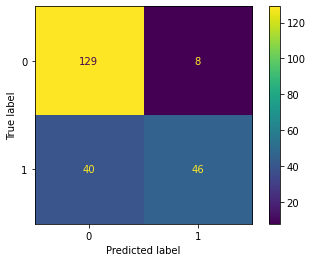

In [75]:
ConfusionMatrixDisplay.from_estimator(grid, X_test_filled, y_test)

#### How did our model do?

---
### KNN imputer for missing values

KNN imputing is based on distance, so we want to scale our data before imputing.

Make a pipeline with StandardScaler, KNNImputer, and a Decision Tree. GridSearch over two hyperparameters of your choosing for the Decision Tree. Max depth is a good one to help our model avoid overfitting. 🙂

#### Evaluate performance on the test set

Plot the confusion matrix and the best tree

--- 
### Disadvantages of decision trees:

- **Not that good (alone):** Their performance is (generally) not competitive with the best supervised learning methods.
- **Prone to overfitting:** They can easily overfit the training data (tuning is required).
- **Often have high variance**: Small variations in the data can result in a completely different tree.
- **Sensitive to class imbalance:** They don't tend to work well if the classes are highly unbalanced.
- **Need number of observations:** They don't tend to work well with very small data sets.

---
## Summary

Cool! You've seen the basics of decision trees! 🎉

Decision Trees are the foundation for a very powerful family models you'll learn about soon.

### Check for Understanding

- What are edges in a graph?
- What is the top node in a decision tree called?
- What are the bottom nodes called?
- What's the most common splitting criterion for classification trees?
- What's the most default splitting criterion for regression trees?
